In [2]:
from google.colab import drive 
drive.mount('/content/drive/')
!pip install --upgrade --no-cache-dir gdown

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [3]:
from torchvision.transforms import ToTensor, Resize
import torch
import torch.nn as nn
import torchtext
from torchvision.transforms import ToTensor, Resize, Compose
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import PIL 
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.2 MB/s eta 0:00:00


In [5]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased", use_fast=True)

In [6]:
attar = "/content/drive/MyDrive/attar_stp_rmv.txt"
ferdousi = "/content/drive/MyDrive/ferdousi_stp_rmv.txt"
hafez = "/content/drive/MyDrive/hafez_stp_rmv.txt"
khayyam = "/content/drive/MyDrive/khayyam_stp_rmv.txt"
moulavi = "/content/drive/MyDrive/moulavi_stp_rmv.txt"
parvin = "/content/drive/MyDrive/parvin_stp_rmv.txt"
roodaki = "/content/drive/MyDrive/roodaki_stp_rmv.txt"
saadi = "/content/drive/MyDrive/saadi_stp_rmv.txt"
saeb = "/content/drive/MyDrive/saeb_stp_rmv.txt"
sanaee = "/content/drive/MyDrive/sanaee_stp_rmv.txt"

with open(attar, "r") as file1:
    attar = file1.read()
with open(ferdousi, "r") as file1:
    ferdousi = file1.read()
with open(hafez, "r") as file1:
    hafez = file1.read()
with open(khayyam , "r") as file1:
    khayyam = file1.read()
with open(moulavi, "r") as file1:
    moulavi = file1.read()
with open(parvin, "r") as file1:
    parvin = file1.read()
with open(roodaki, "r") as file1:
    roodaki = file1.read()
with open(saadi, "r") as file1:
    saadi = file1.read()
with open(saeb, "r") as file1:
    saeb = file1.read()
with open(sanaee, "r") as file1:
    sanaee = file1.read()
                               
   

In [7]:
attarlist = attar.split("\n")
ferdousilist = ferdousi.split("\n")
hafezlist = hafez.split("\n")
khayyamlist = khayyam.split("\n")
moulavilist = moulavi.split("\n")
parvinlist = parvin.split("\n")
roodakilist = roodaki.split("\n")
saadilist = saadi.split("\n")
saeblist = saeb.split("\n")
sanaeelist = sanaee.split("\n")

In [8]:
labels1 = [0]*len(attarlist)
df1 = pd.DataFrame(list(zip(attarlist, labels1)), columns =['Text', 'label'])

labels2 = [1]*len(ferdousilist)
df2 = pd.DataFrame(list(zip(ferdousilist, labels2)), columns =['Text', 'label'])

labels3 = [2]*len(hafezlist)
df3 = pd.DataFrame(list(zip(hafezlist, labels3)), columns =['Text', 'label'])

labels4 = [3]*len(khayyamlist)
df4 = pd.DataFrame(list(zip(khayyamlist, labels4)), columns =['Text', 'label'])

labels5 = [4]*len(moulavilist)
df5 = pd.DataFrame(list(zip(moulavilist, labels5)), columns =['Text', 'label'])

labels6 = [5]*len(parvinlist)
df6 = pd.DataFrame(list(zip(parvinlist, labels6)), columns =['Text', 'label'])

labels7 = [6]*len(roodakilist)
df7 = pd.DataFrame(list(zip(roodakilist, labels7)), columns =['Text', 'label'])

labels8 = [7]*len(saadilist)
df8 = pd.DataFrame(list(zip(saadilist, labels8)), columns =['Text', 'label'])

labels9 = [8]*len(saeblist)
df9 = pd.DataFrame(list(zip(saeblist, labels9)), columns =['Text', 'label'])

labels10 = [9]*len(sanaeelist)
df10 = pd.DataFrame(list(zip(sanaeelist, labels10)), columns =['Text', 'label'])


In [9]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=0)
df

,Text,label
0,,0
1,,0
2,مردی عشق یار,0
3,سجاده زاهدان درد قمار,0
4,جان مردان گردان,0
...,...,...
57711,جبرییل فلک تحسین,9
57712,,9
57713,,9
57714,ختم نظم سعادت,9


In [10]:
df = df.replace(r'^s*$', float('NaN'), regex = True)

In [11]:
df = df.dropna()
df = df.reset_index()
df=df.drop('index', axis=1)
#df=df.drop('level_0', axis=1)
df

,Text,label
0,مردی عشق یار,0
1,سجاده زاهدان درد قمار,0
2,جان مردان گردان,0
3,رندان,0
4,ساقیان معنی زاهدان نشینند,0
...,...,...
462442,خاکیان جان نثار سازند,9
462443,قدسیان خرقه اندازند,9
462444,عزت تمکین,9
462445,جبرییل فلک تحسین,9


In [12]:
df = df.sample(frac = 1)

In [13]:
df

,Text,label
70407,عالم عالم جهان جهان راز,0
307166,خصم پیل,4
33972,خواب کودک آغاز,0
114294,آفرینش بحق,0
13898,شب خشک کشتی رانده,0
...,...,...
438704,کدخدایی خدایی برنج,9
39712,ریش نیش اوفکنده,0
445148,ساکن اویست ساحلست روان,9
435152,زهره چرخ سیم مریدت,9


In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [15]:
train_texts = train['Text'].tolist()
train_labels = train['label'].tolist()
test_texts = test['Text'].tolist()
test_labels = test['label'].tolist()


In [16]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

In [17]:
import torch

class MSDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MSDataset(train_encodings, train_labels)
test_dataset = MSDataset(test_encodings, test_labels)

In [18]:
from transformers import AutoModel, AdamW
from torch import nn

class TextClassifier(nn.Module):
  def __init__(self):
    super(TextClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained('HooshvareLab/bert-fa-base-uncased')
    self.fc1 = nn.Linear(768, 32)
    self.fc2 = nn.Linear(32, 10)
  
  def forward(self, input_ids, attention_mask):
    temp = input_ids
    temp = self.bert(input_ids, attention_mask=attention_mask)[1]
    temp = self.fc1(temp)
    temp = self.fc2(temp)
    return temp

In [58]:
model = TextClassifier()

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [59]:
from torch.utils.data import DataLoader


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

TextClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [60]:
print(device)

cuda


In [61]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

learning_rate = 5e-5
optim = torch.optim.AdamW(model.parameters(), lr=learning_rate)
loss_func = nn.CrossEntropyLoss().to(device)
     

In [62]:
for p in model.bert.parameters():
  p.requires_grad = False

In [65]:
from tqdm.auto import tqdm

for epoch in range(5):
  model.train()
  running_loss = 0
  correct = 0
  for batch in tqdm(train_loader):
    optim.zero_grad()
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    loss = loss_func(outputs, labels)
    loss.backward()
    running_loss += loss.item()
    correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
    optim.step()
  correct /= len(train_loader.dataset)  
  print(f"training loss at epoch {epoch}: {running_loss/len(train_loader)}, , Accuracy = {(100*correct):>0.1f}")

  model.eval()
  running_loss = 0
  correct = 0
  for batch in tqdm(test_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    loss = loss_func(outputs, labels)
    running_loss += loss.item()
    correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
  correct /= len(test_loader.dataset)
  print(f"test loss at epoch {epoch}: {running_loss/len(test_loader)}, Accuracy = {(100*correct):>0.1f}")

  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 0: 1.5523749153924298, , Accuracy = 46.6


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 0: 1.4879753763846402, Accuracy = 48.9


  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 1: 1.509472255565425, , Accuracy = 47.7


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 1: 1.4693319483101883, Accuracy = 49.3


  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 2: 1.4998305024703946, , Accuracy = 48.0


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 2: 1.4652252176854488, Accuracy = 49.3


  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 3: 1.4948313193214406, , Accuracy = 48.1


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 3: 1.4563019185361463, Accuracy = 49.9


  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 4: 1.4916447865139657, , Accuracy = 48.3


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 4: 1.4525406757097103, Accuracy = 49.8


In [66]:
y_pred = []
y_true = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        y_pred.extend(outputs.argmax(1).cpu().numpy())
        y_true.extend(labels.cpu().numpy())

  0%|          | 0/2891 [00:00<?, ?it/s]

In [67]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.48      0.89      0.63     37831
           1       0.58      0.58      0.58     19692
           2       0.33      0.00      0.00      1899
           3       0.00      0.00      0.00       294
           4       0.28      0.02      0.04     10610
           5       0.00      0.00      0.00      2186
           6       0.00      0.00      0.00       457
           7       0.23      0.00      0.00      6121
           8       0.32      0.08      0.13      3080
           9       0.29      0.04      0.08     10320

    accuracy                           0.50     92490
   macro avg       0.25      0.16      0.15     92490
weighted avg       0.42      0.50      0.40     92490



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


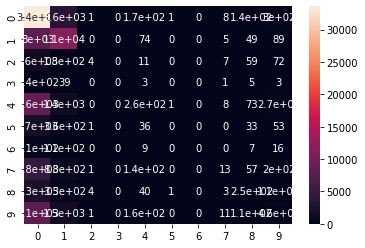

In [68]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
sb.heatmap(cf_matrix, annot=True)
plt.show()

In [69]:
torch.save(model.state_dict(), 'HW4_P3_Part1_model.pth')

In [ ]:
dict(model.named_parameters())

{'bert.embeddings.word_embeddings.weight': Parameter containing:
 tensor([[-0.0063, -0.0013, -0.0461,  ..., -0.0176,  0.1102, -0.0451],
         [-0.0127, -0.0224, -0.0217,  ..., -0.0161,  0.1414, -0.0221],
         [-0.0091, -0.0302, -0.0019,  ..., -0.0012,  0.0303, -0.0119],
         ...,
         [ 0.0089, -0.0277, -0.0319,  ..., -0.0205,  0.0988, -0.0379],
         [ 0.0173, -0.0088, -0.0420,  ..., -0.0193,  0.0890, -0.0166],
         [ 0.0097, -0.0030, -0.0255,  ..., -0.0054,  0.0968, -0.0641]],
        device='cuda:0'),
 'bert.embeddings.position_embeddings.weight': Parameter containing:
 tensor([[-0.0264, -0.0985,  0.0128,  ..., -0.0372,  0.0557, -0.0513],
         [ 0.0034, -0.0045, -0.0088,  ..., -0.0189,  0.0420, -0.0082],
         [ 0.0096, -0.0076, -0.0003,  ..., -0.0048,  0.0238, -0.0032],
         ...,
         [-0.0103, -0.0167, -0.0147,  ...,  0.0071,  0.0528, -0.0023],
         [-0.0012, -0.0081, -0.0259,  ..., -0.0087,  0.1086, -0.0087],
         [ 0.0016, -0.0123, -0

## Part 2


In [19]:
model2 = TextClassifier()

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model2.to(device)

TextClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [33]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)
learning_rate = 5e-5
optim = torch.optim.AdamW(model2.parameters(), lr=learning_rate)
loss_func = nn.CrossEntropyLoss().to(device)

for p in model2.bert.parameters():
  p.requires_grad = True

In [23]:
dict(model2.named_parameters())

{'bert.embeddings.word_embeddings.weight': Parameter containing:
 tensor([[-0.0063, -0.0013, -0.0461,  ..., -0.0176,  0.1102, -0.0451],
         [-0.0127, -0.0224, -0.0217,  ..., -0.0161,  0.1414, -0.0221],
         [-0.0091, -0.0302, -0.0019,  ..., -0.0012,  0.0303, -0.0119],
         ...,
         [ 0.0089, -0.0277, -0.0319,  ..., -0.0205,  0.0988, -0.0379],
         [ 0.0173, -0.0088, -0.0420,  ..., -0.0193,  0.0890, -0.0166],
         [ 0.0097, -0.0030, -0.0255,  ..., -0.0054,  0.0968, -0.0641]],
        device='cuda:0', requires_grad=True),
 'bert.embeddings.position_embeddings.weight': Parameter containing:
 tensor([[-0.0264, -0.0985,  0.0128,  ..., -0.0372,  0.0557, -0.0513],
         [ 0.0034, -0.0045, -0.0088,  ..., -0.0189,  0.0420, -0.0082],
         [ 0.0096, -0.0076, -0.0003,  ..., -0.0048,  0.0238, -0.0032],
         ...,
         [-0.0103, -0.0167, -0.0147,  ...,  0.0071,  0.0528, -0.0023],
         [-0.0012, -0.0081, -0.0259,  ..., -0.0087,  0.1086, -0.0087],
         [

* ADAM


In [35]:
from tqdm.auto import tqdm

for epoch in range(3):
  model2.train()
  running_loss = 0
  correct = 0
  for batch in tqdm(train_loader):
    optim.zero_grad()
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    outputs = model2(input_ids, attention_mask=attention_mask)
    loss = loss_func(outputs, labels)
    loss.backward()
    running_loss += loss.item()
    correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
    optim.step()
  correct /= len(train_loader.dataset)  
  print(f"training loss at epoch {epoch}: {running_loss/len(train_loader)}, , Accuracy = {(100*correct):>0.1f}")

  model2.eval()
  running_loss = 0
  correct = 0
  for batch in tqdm(test_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    outputs = model2(input_ids, attention_mask=attention_mask)
    loss = loss_func(outputs, labels)
    running_loss += loss.item()
    correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
  correct /= len(test_loader.dataset)
  print(f"test loss at epoch {epoch}: {running_loss/len(test_loader)}, Accuracy = {(100*correct):>0.1f}")

  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 0: 1.4286655328679043, , Accuracy = 50.7


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 0: 1.700831394960871, Accuracy = 40.9


  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 1: 1.6951527066726315, , Accuracy = 40.8


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 1: 1.699507131332429, Accuracy = 40.9


  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 2: 1.693917520222138, , Accuracy = 40.8


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 2: 1.6965152486638189, Accuracy = 40.9


In [36]:
y_pred = []
y_true = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model2(input_ids, attention_mask=attention_mask)
        y_pred.extend(outputs.argmax(1).cpu().numpy())
        y_true.extend(labels.cpu().numpy())

  0%|          | 0/2891 [00:00<?, ?it/s]

In [37]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58     37831
           1       0.00      0.00      0.00     19692
           2       0.00      0.00      0.00      1899
           3       0.00      0.00      0.00       294
           4       0.00      0.00      0.00     10610
           5       0.00      0.00      0.00      2186
           6       0.00      0.00      0.00       457
           7       0.00      0.00      0.00      6121
           8       0.00      0.00      0.00      3080
           9       0.00      0.00      0.00     10320

    accuracy                           0.41     92490
   macro avg       0.04      0.10      0.06     92490
weighted avg       0.17      0.41      0.24     92490



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


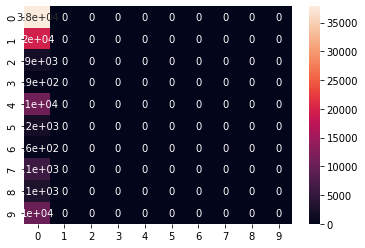

In [38]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
sb.heatmap(cf_matrix, annot=True)
plt.show()

In [40]:
torch.save(model2.state_dict(), 'HW4_P3_Part2_model_ADAM.pth')

* SGD

In [41]:
optim = torch.optim.SGD(model2.parameters(), lr=learning_rate)

In [43]:
from tqdm.auto import tqdm

for epoch in range(3):
  model2.train()
  running_loss = 0
  correct = 0
  for batch in tqdm(train_loader):
    optim.zero_grad()
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    outputs = model2(input_ids, attention_mask=attention_mask)
    loss = loss_func(outputs, labels)
    loss.backward()
    running_loss += loss.item()
    correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
    optim.step()
  correct /= len(train_loader.dataset)  
  print(f"training loss at epoch {epoch}: {running_loss/len(train_loader)}, , Accuracy = {(100*correct):>0.1f}")

  model2.eval()
  running_loss = 0
  correct = 0
  for batch in tqdm(test_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    outputs = model2(input_ids, attention_mask=attention_mask)
    loss = loss_func(outputs, labels)
    running_loss += loss.item()
    correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
  correct /= len(test_loader.dataset)
  print(f"test loss at epoch {epoch}: {running_loss/len(test_loader)}, Accuracy = {(100*correct):>0.1f}")

  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 0: 1.6905938079137217, , Accuracy = 40.8


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 0: 1.6940898304783898, Accuracy = 40.9


  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 1: 1.6905023828023178, , Accuracy = 40.8


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 1: 1.6941701838896788, Accuracy = 40.9


  0%|          | 0/23123 [00:00<?, ?it/s]

training loss at epoch 2: 1.690527996028918, , Accuracy = 40.8


  0%|          | 0/2891 [00:00<?, ?it/s]

test loss at epoch 2: 1.6942052105973229, Accuracy = 40.9


In [44]:
y_pred = []
y_true = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model2(input_ids, attention_mask=attention_mask)
        y_pred.extend(outputs.argmax(1).cpu().numpy())
        y_true.extend(labels.cpu().numpy())

  0%|          | 0/2891 [00:00<?, ?it/s]

In [48]:
print(classification_report(y_true=y_true, y_pred=y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.41      1.00      0.58     37831
           1       0.00      0.00      0.00     19692
           2       0.00      0.00      0.00      1899
           3       0.00      0.00      0.00       294
           4       0.00      0.00      0.00     10610
           5       0.00      0.00      0.00      2186
           6       0.00      0.00      0.00       457
           7       0.00      0.00      0.00      6121
           8       0.00      0.00      0.00      3080
           9       0.00      0.00      0.00     10320

    accuracy                           0.41     92490
   macro avg       0.04      0.10      0.06     92490
weighted avg       0.17      0.41      0.24     92490



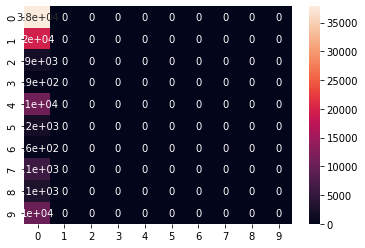

In [46]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
sb.heatmap(cf_matrix, annot=True)
plt.show()

In [47]:
torch.save(model2.state_dict(), 'HW4_P3_Part2_model_SGD.pth')

# Part 3

In [49]:
sample_df = df.sample(n=1000)

In [50]:
sample_texts = sample_df['Text'].tolist()
sample_labels = sample_df['label'].tolist()

In [51]:
sample_encodings = tokenizer(sample_texts, truncation=True, padding=True, max_length=512)

In [52]:
sample_dataset = MSDataset(sample_encodings, sample_labels)

In [53]:
sample_loader = DataLoader(sample_dataset, batch_size=16, shuffle=True)

In [70]:
model.eval()
running_loss = 0
correct = 0
for batch in tqdm(sample_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    loss = loss_func(outputs, labels)
    running_loss += loss.item()
print(f"loss : {running_loss/len(sample_loader)}")
print(f"perplexity : {np.exp(running_loss/len(sample_loader))}")

  0%|          | 0/63 [00:00<?, ?it/s]

loss : 1.4662596081930495
perplexity : 4.332997683731675


In [57]:
model2.eval()
running_loss = 0
correct = 0
for batch in tqdm(sample_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    outputs = model2(input_ids, attention_mask=attention_mask)
    loss = loss_func(outputs, labels)
    running_loss += loss.item()
print(f"loss : {running_loss/len(sample_loader)}")
print(f"perplexity : {np.exp(running_loss/len(sample_loader))}")

  0%|          | 0/63 [00:00<?, ?it/s]

loss : 1.7221075807298933
perplexity : 5.596310720519713
